# prepare data

In [18]:
import cv2 as cv
import os
import numpy as np
from sklearn.cluster import DBSCAN,mean_shift,KMeans

In [19]:
data = []
label = []
IMG_SIZE = 32
prefix_path = "./Train/"
sub_paths = [str(i) for i in range(43)]
for sub_path in sub_paths:
    path = prefix_path + sub_path +"/"
    number = 0
    for file in os.listdir(path):
        img = cv.imread(path + file)
        img = cv.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img.astype('float32')
        label.append(int(sub_path))
        data.append(img)
        number = number+1
        if number > 199:
            break
data = np.array(data)
print(data.shape)

(8600, 32, 32, 3)


In [20]:
data_label = np.array([int(i) for i in label])

In [21]:
# Data Normalization
# Normalization
from sklearn.preprocessing import StandardScaler
# data = data/255.0
reshaped_data = data.reshape(len(data),-1)
reshaped_data = StandardScaler().fit_transform(reshaped_data)
reshaped_data.shape

(8600, 3072)

In [22]:
print(reshaped_data.shape)

(8600, 3072)


# single linkage

In [23]:
from clustimage import Clustimage
import pandas as pd
Xraw = reshaped_data
cl = Clustimage(method='pca',
                embedding='tsne',
                grayscale=False,
                dim=(32,32),
                params_pca={'n_components':0.95},
                store_to_disk=True,
                verbose=50)
filenames = list(map(lambda x: str(x) + '.png', np.arange(0, reshaped_data.shape[0])))
Xraw = pd.DataFrame(Xraw, index=filenames)
print(Xraw)

              0         1         2         3         4         5     \
0.png     1.020967  1.025078  1.268246  0.274916  0.505294  1.032035   
1.png    -0.023040  0.790790  0.526703 -0.137457  0.700525  0.394440   
2.png    -0.242152 -0.172394  0.071369 -0.330757 -0.262612 -0.113033   
3.png    -0.293708 -0.406682 -0.253869 -0.266324 -0.340704 -0.269179   
4.png     0.312074  0.296182  0.305541  0.326463  0.297048  0.290343   
...            ...       ...       ...       ...       ...       ...   
8595.png -0.951046 -1.005418 -1.021431 -0.962204 -1.017503 -1.049907   
8596.png -0.912379 -0.979386 -0.995412 -0.910658 -0.978457 -1.010870   
8597.png -0.886601 -0.927322 -0.917355 -0.936431 -0.978457 -0.984846   
8598.png -0.886601 -0.862242 -0.826288 -0.897771 -0.874334 -0.854725   
8599.png -0.886601 -0.888274 -0.865316 -0.884884 -0.874334 -0.867737   

              6         7         8         9     ...      3062      3063  \
0.png    -0.017754  0.376545  1.052711  0.030038  ...  0.5

In [24]:
results = cl.fit_transform(Xraw,
                           cluster='agglomerative',
                           evaluate='silhouette',
                           metric='euclidean',
                           linkage='single',
                           min_clust=40,
                           max_clust=50,
                           cluster_space='high')

[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [3072] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [191] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [3072] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.

[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: single
[clusteval] >Evaluate using silhouette.


100%|██████████| 10/10 [00:12<00:00,  1.20s/it]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [40].
[clusteval] >Fin.


In [25]:
cl.results.keys()

dict_keys(['img', 'feat', 'xycoord', 'pathnames', 'labels', 'url', 'filenames'])

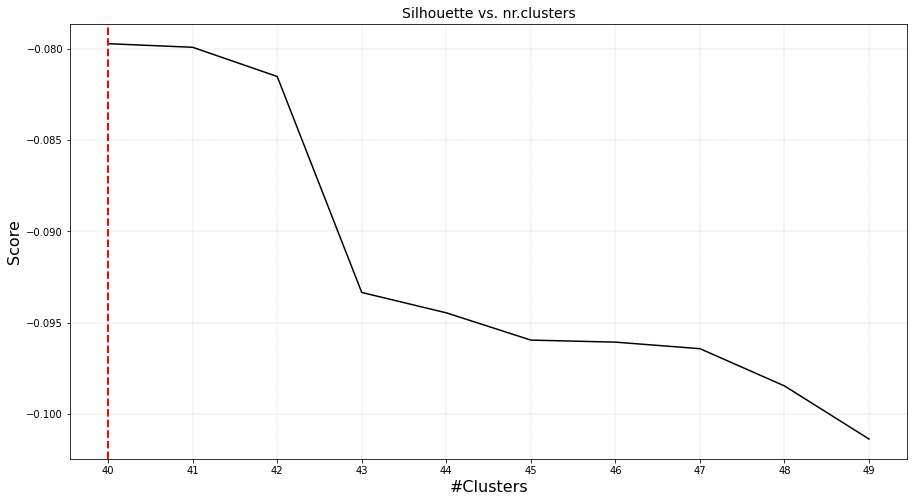

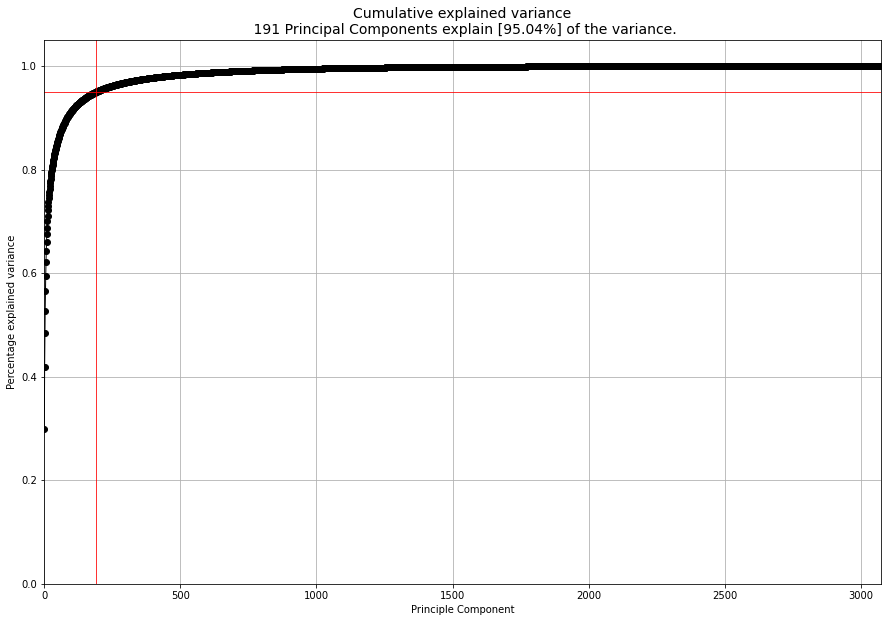

<Figure size 432x288 with 0 Axes>

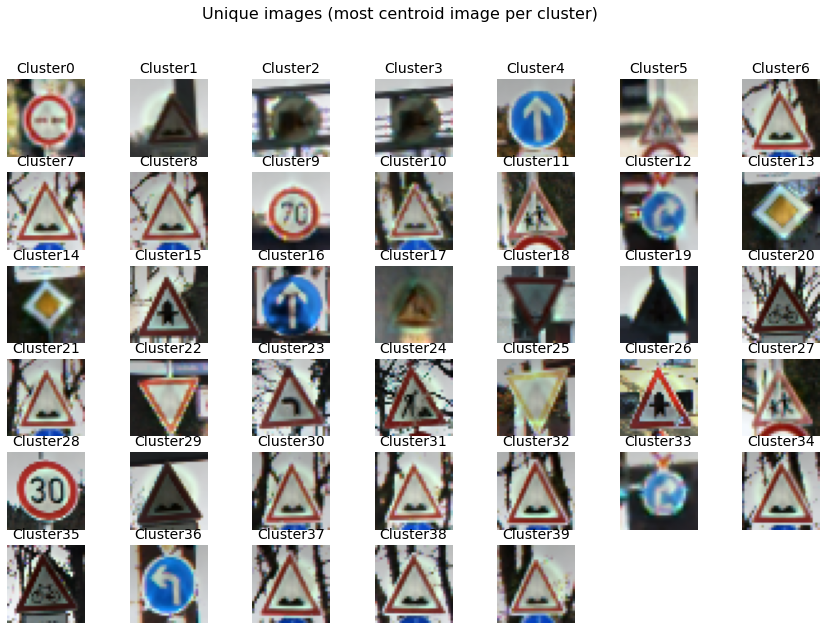

[colourmap]> Warning: Colormap [Set1] can not create [40] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [40] unique colors! Available unique colors: [9].


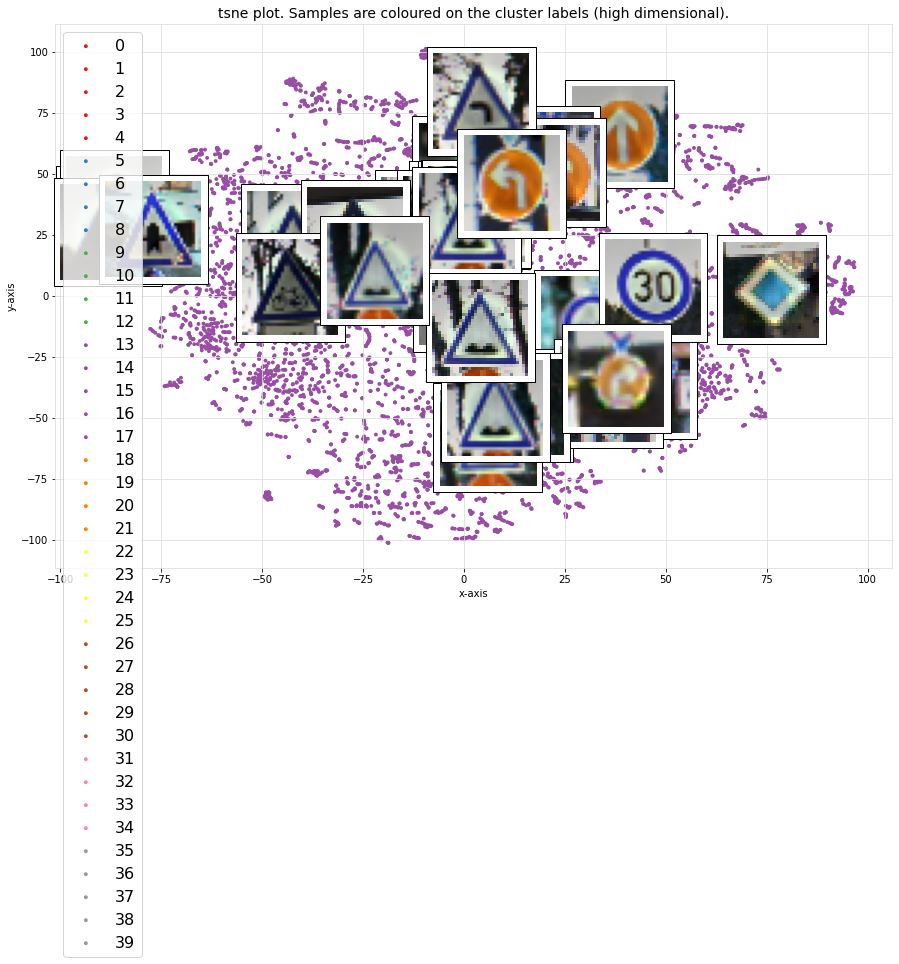

[colourmap]> Warning: Colormap [Set1] can not create [40] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [40] unique colors! Available unique colors: [9].


<Figure size 432x288 with 0 Axes>

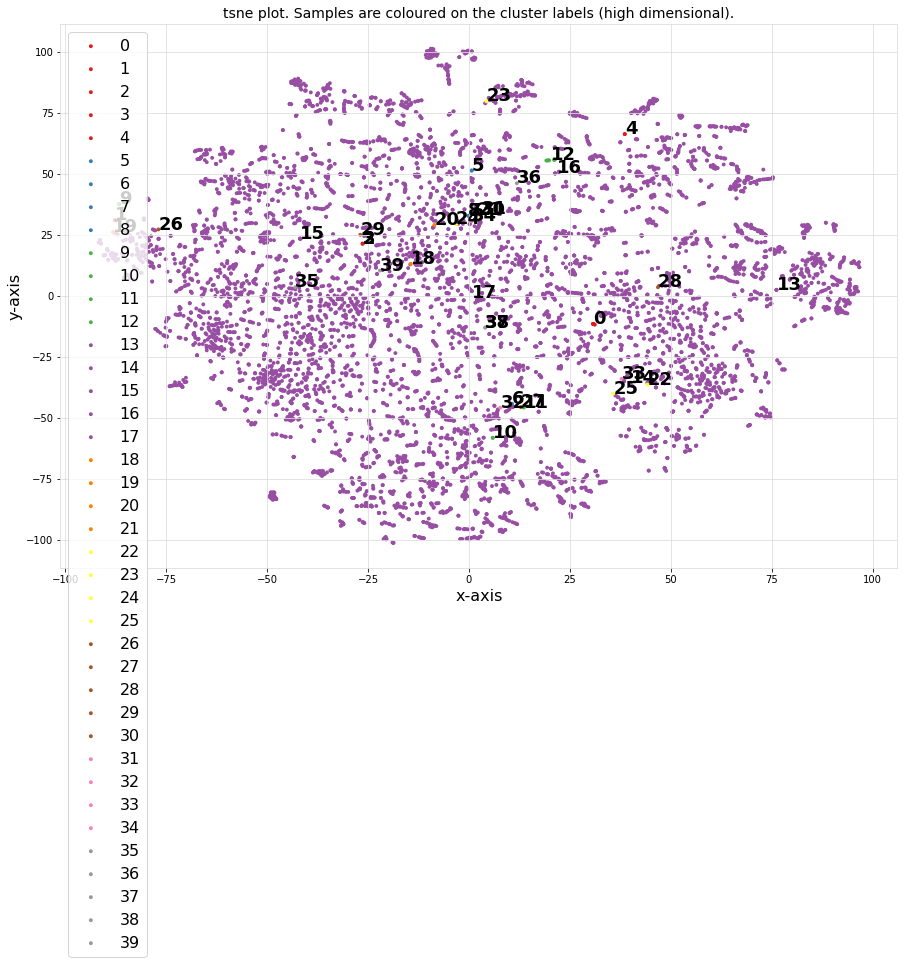

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot: title={'center': 'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 432x288 with 0 Axes>

In [26]:
# Silhouette plots
cl.clusteval.plot()
# PCA explained variance plot
cl.pca.plot()
# Plot unique image per cluster
cl.plot_unique(img_mean=False)
# Scatterplot
cl.scatter(zoom=3, img_mean=False)
cl.scatter(zoom=None, img_mean=False)

# ward linkage(best)

In [27]:
cl = Clustimage(method='pca',
                embedding='tsne',
                grayscale=False,
                dim=(32,32),
                params_pca={'n_components':0.95},
                verbose=50)
results = cl.fit_transform(Xraw,
                           cluster='agglomerative',
                           evaluate='silhouette',
                           metric='euclidean',
                           linkage='ward',
                           min_clust=40,
                           max_clust=50,
                           cluster_space='high')
cl.results.keys()

[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [3072] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [191] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [3072] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.

[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 10/10 [00:10<00:00,  1.04s/it]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [49].
[clusteval] >Fin.


dict_keys(['img', 'feat', 'xycoord', 'pathnames', 'labels', 'url', 'filenames'])

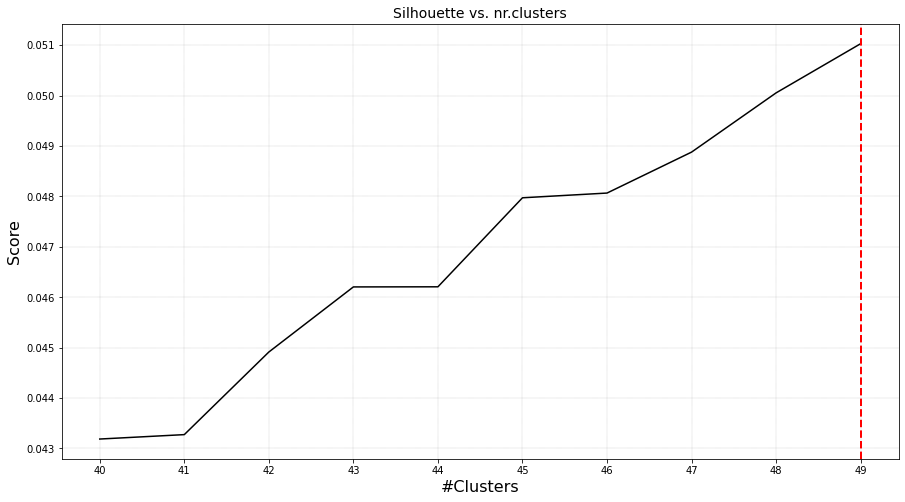

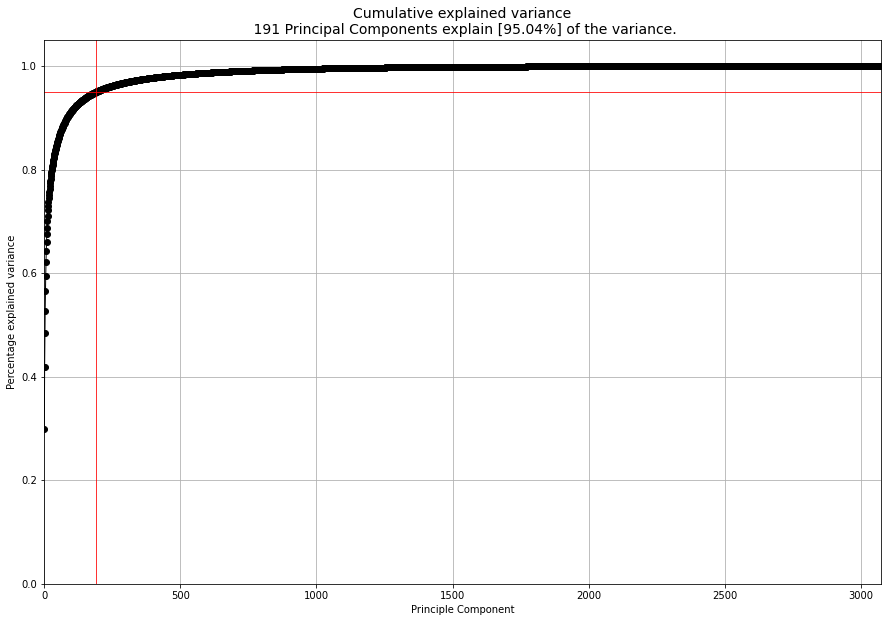

<Figure size 432x288 with 0 Axes>

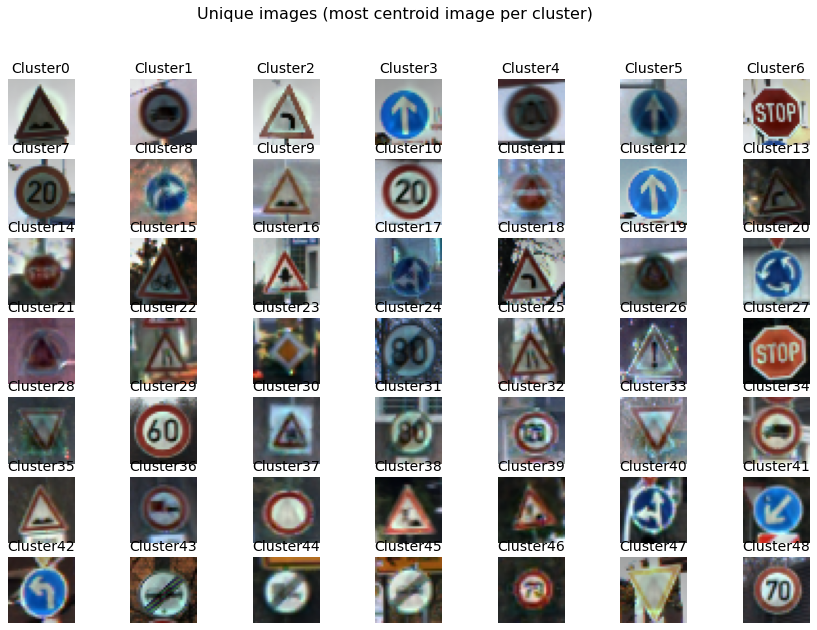

[colourmap]> Warning: Colormap [Set1] can not create [49] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [49] unique colors! Available unique colors: [9].


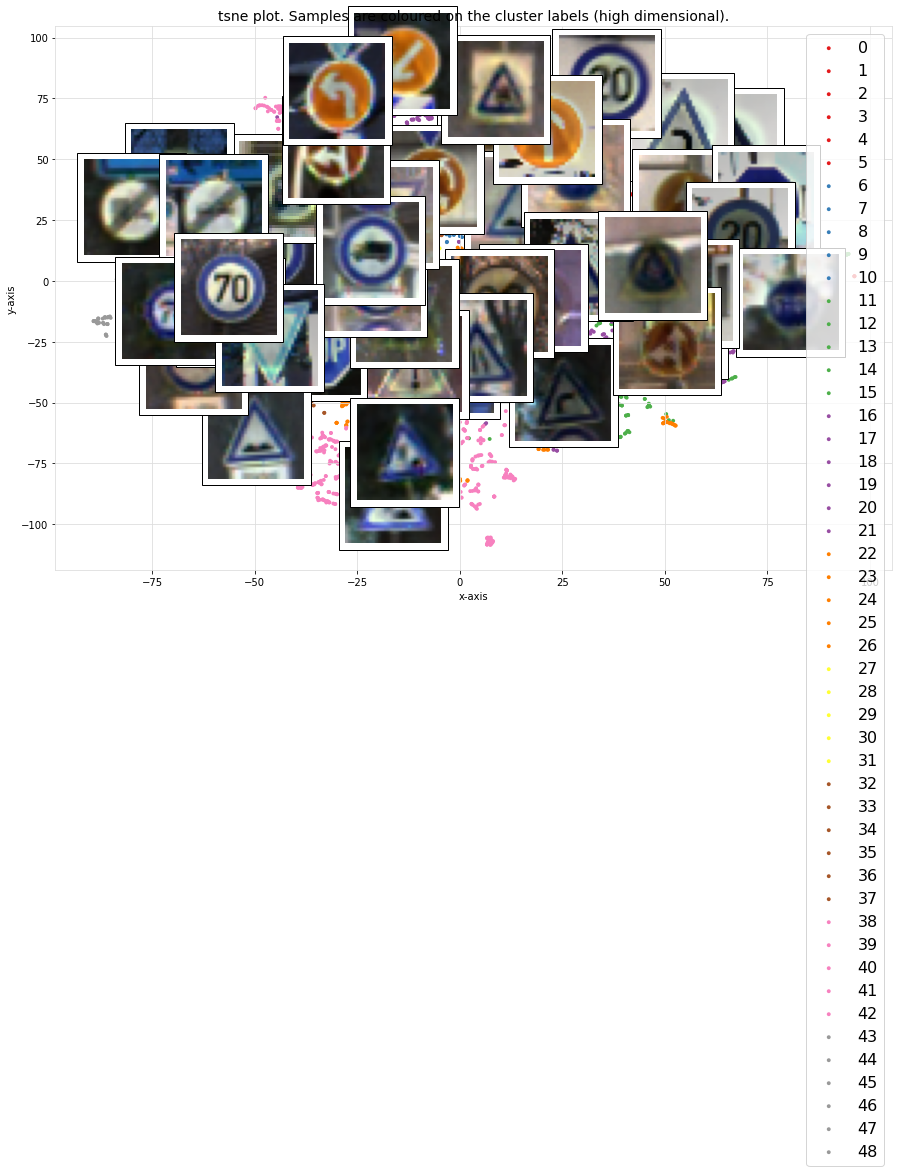

[colourmap]> Warning: Colormap [Set1] can not create [49] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [49] unique colors! Available unique colors: [9].


<Figure size 432x288 with 0 Axes>

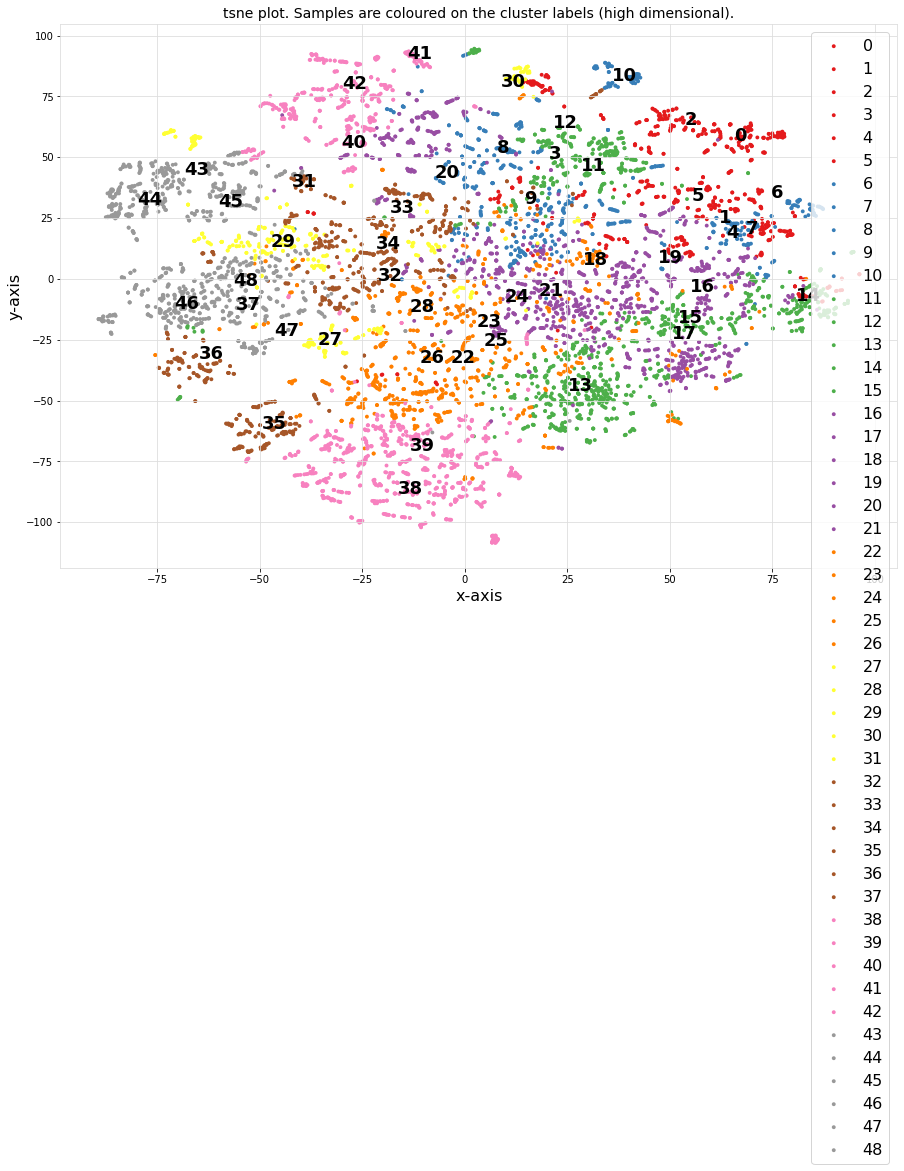

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot: title={'center': 'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 432x288 with 0 Axes>

In [28]:
# Silhouette plots
cl.clusteval.plot()
# PCA explained variance plot
cl.pca.plot()
# Plot unique image per cluster
cl.plot_unique(img_mean=False)
# Scatterplot
cl.scatter(zoom=3, img_mean=False)
cl.scatter(zoom=None, img_mean=False)

# centroid linkage

In [29]:
cl = Clustimage(method='pca',
                embedding='tsne',
                grayscale=False,
                dim=(32,32),
                params_pca={'n_components':0.95},
                verbose=50)
results = cl.fit_transform(Xraw,
                           cluster='agglomerative',
                           evaluate='silhouette',
                           metric='euclidean',
                           linkage='centroid',
                           min_clust=40,
                           max_clust=50,
                           cluster_space='high')
cl.results.keys()

[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [3072] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [191] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [3072] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.

[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: centroid
[clusteval] >Evaluate using silhouette.


100%|██████████| 10/10 [00:12<00:00,  1.22s/it]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [46].
[clusteval] >Fin.


dict_keys(['img', 'feat', 'xycoord', 'pathnames', 'labels', 'url', 'filenames'])

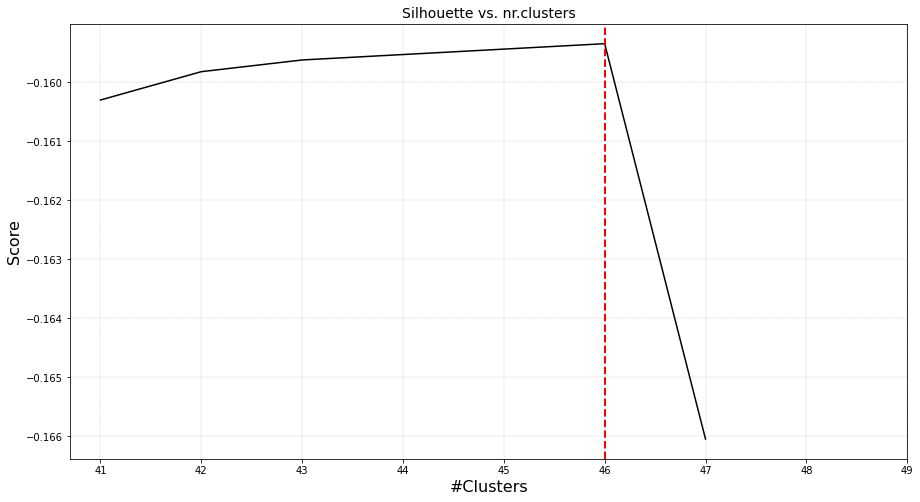

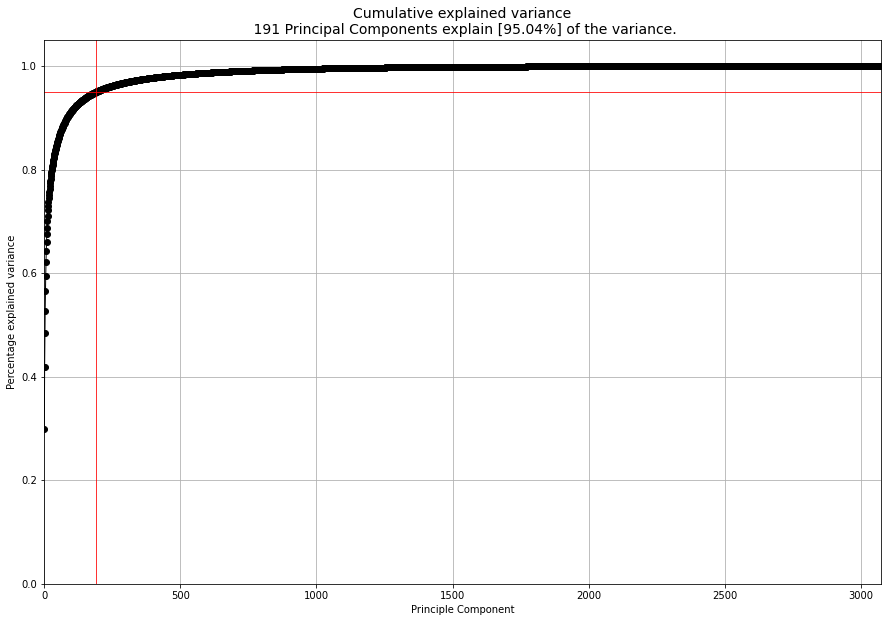

<Figure size 432x288 with 0 Axes>

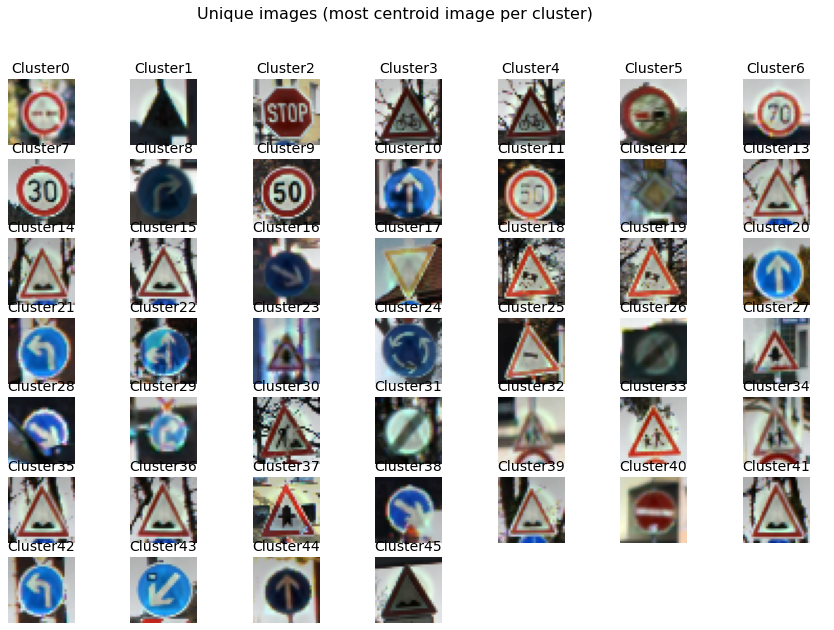

[colourmap]> Warning: Colormap [Set1] can not create [46] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [46] unique colors! Available unique colors: [9].


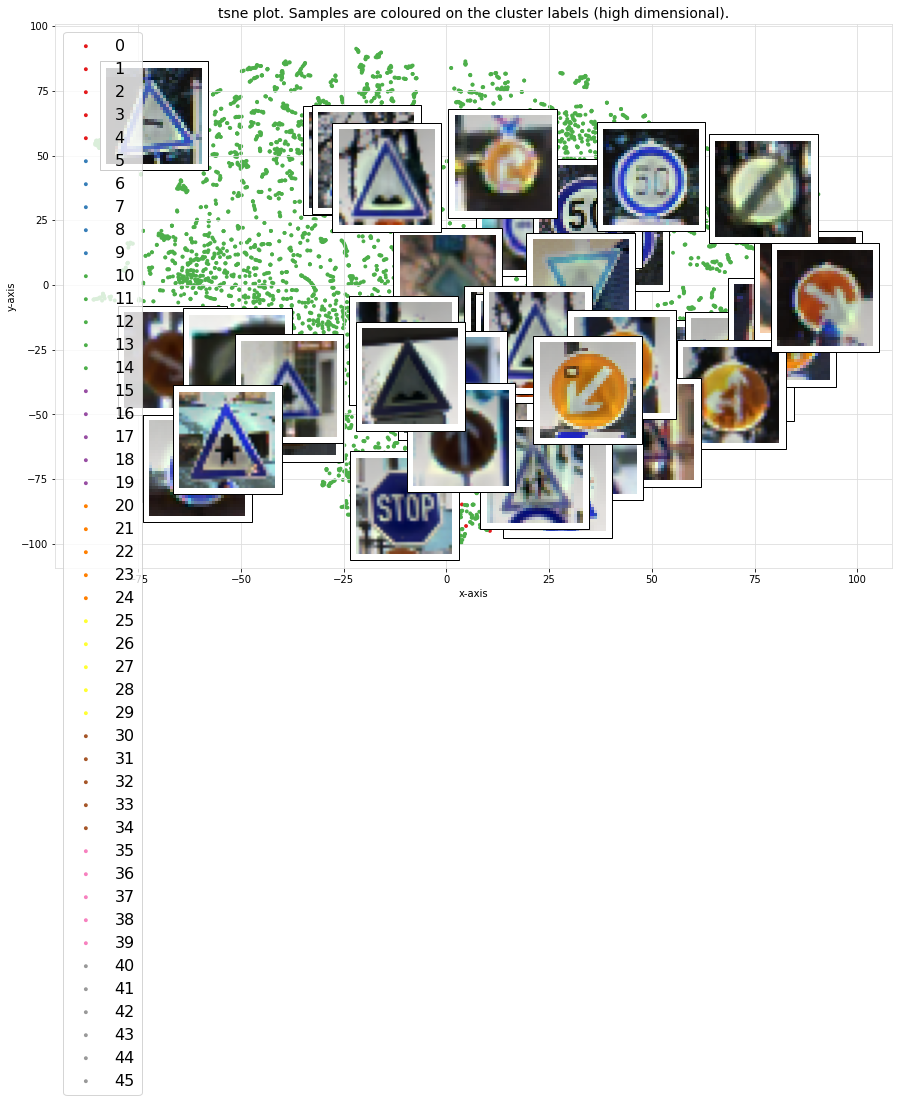

[colourmap]> Warning: Colormap [Set1] can not create [46] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [46] unique colors! Available unique colors: [9].


<Figure size 432x288 with 0 Axes>

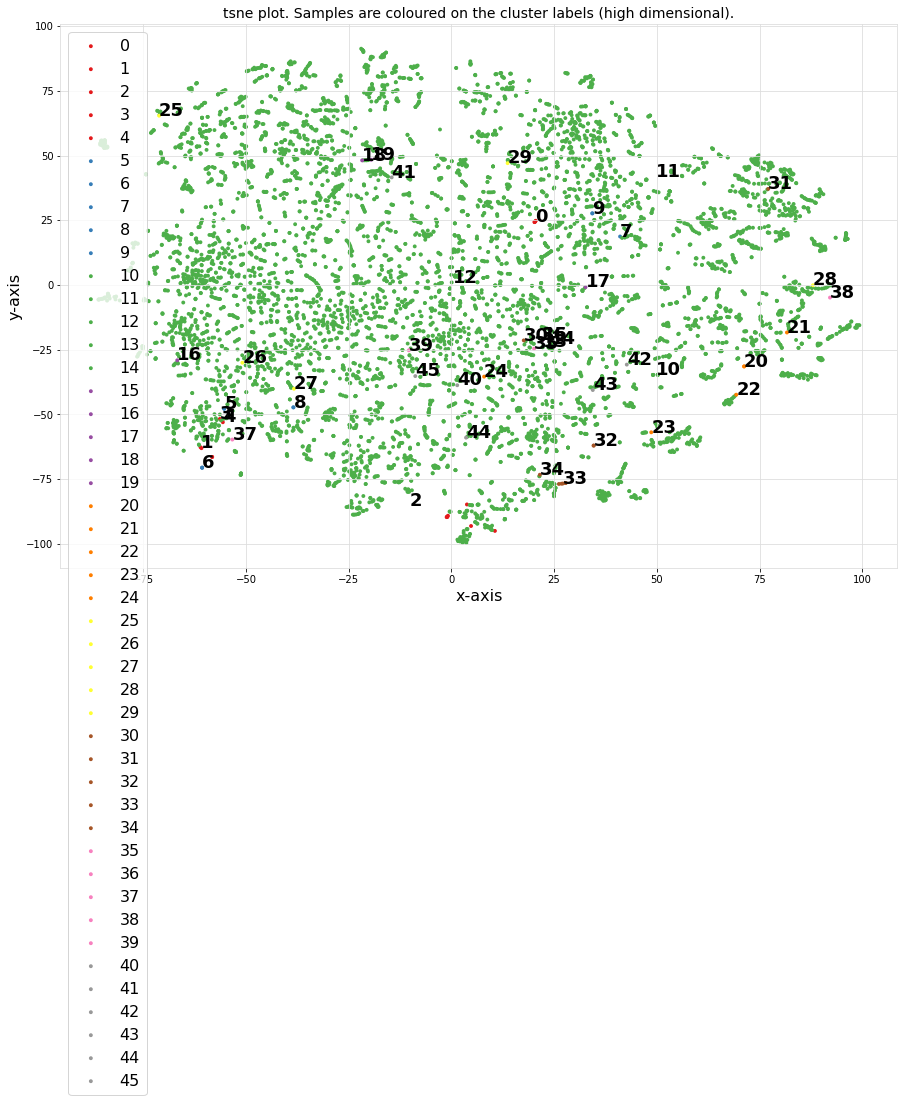

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot: title={'center': 'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 432x288 with 0 Axes>

In [30]:
# Silhouette plots
cl.clusteval.plot()
# PCA explained variance plot
cl.pca.plot()
# Plot unique image per cluster
cl.plot_unique(img_mean=False)
# Scatterplot
cl.scatter(zoom=3, img_mean=False)
cl.scatter(zoom=None, img_mean=False)

# complete linkage

In [31]:
cl = Clustimage(method='pca',
                embedding='tsne',
                grayscale=False,
                dim=(32,32),
                params_pca={'n_components':0.95},
                verbose=50)
results = cl.fit_transform(Xraw,
                           cluster='agglomerative',
                           evaluate='silhouette',
                           metric='euclidean',
                           linkage='complete',
                           min_clust=40,
                           max_clust=50,
                           cluster_space='high')
cl.results.keys()

[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [3072] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [191] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [3072] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.

[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: complete
[clusteval] >Evaluate using silhouette.


100%|██████████| 10/10 [00:11<00:00,  1.18s/it]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [49].
[clusteval] >Fin.


dict_keys(['img', 'feat', 'xycoord', 'pathnames', 'labels', 'url', 'filenames'])

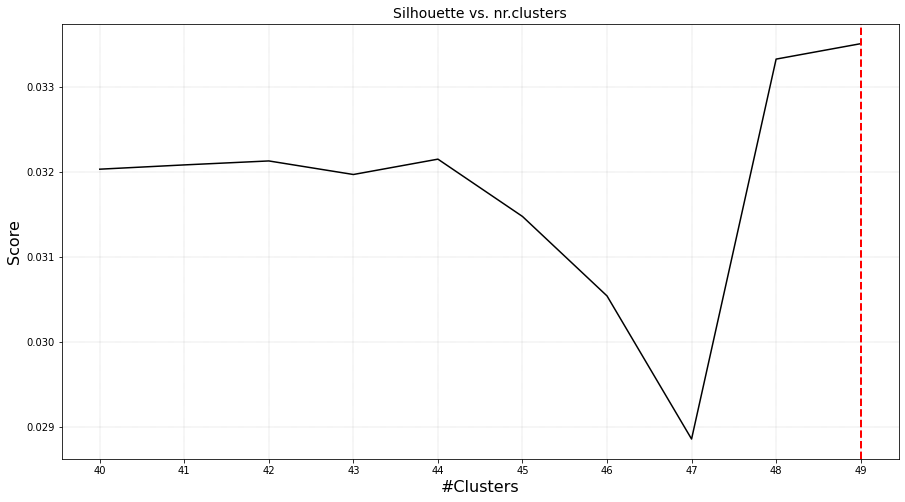

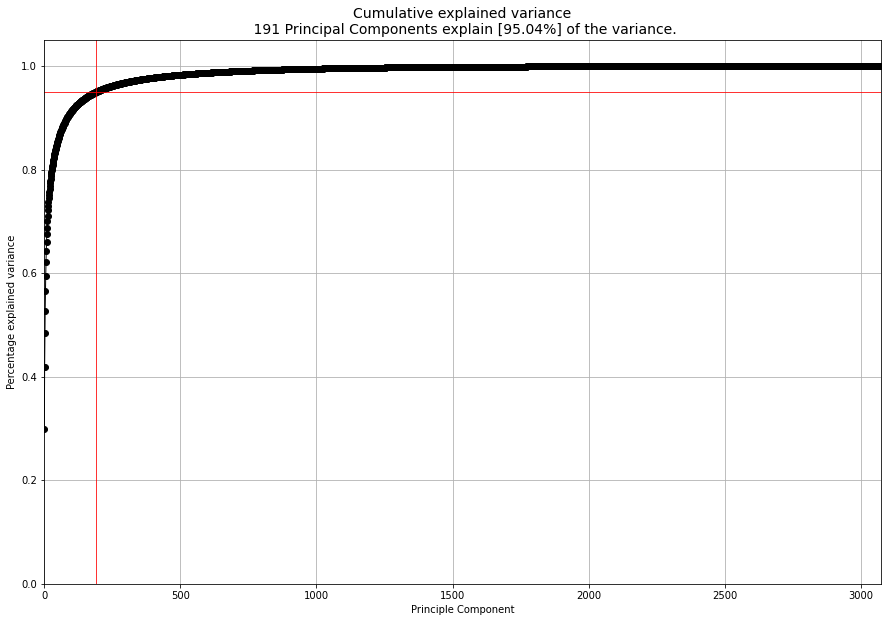

<Figure size 432x288 with 0 Axes>

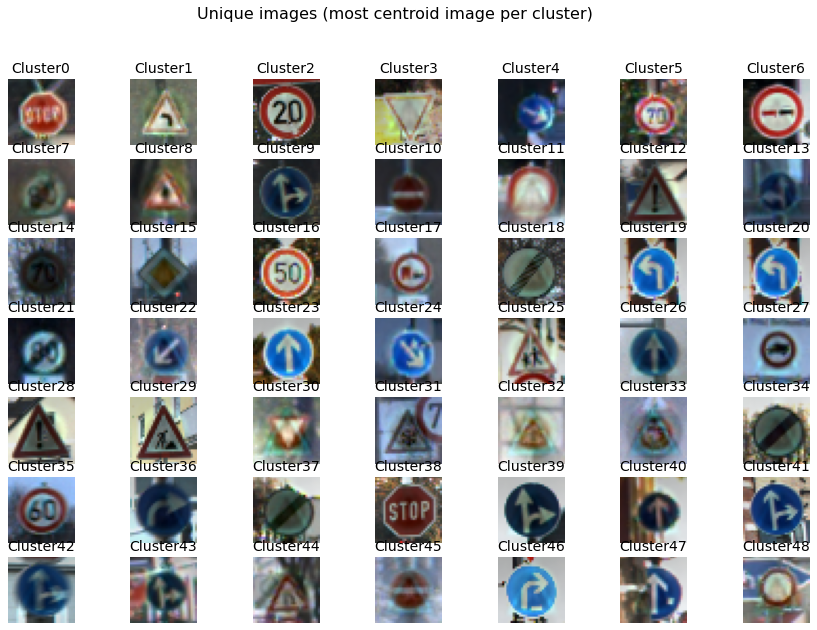

[colourmap]> Warning: Colormap [Set1] can not create [49] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [49] unique colors! Available unique colors: [9].


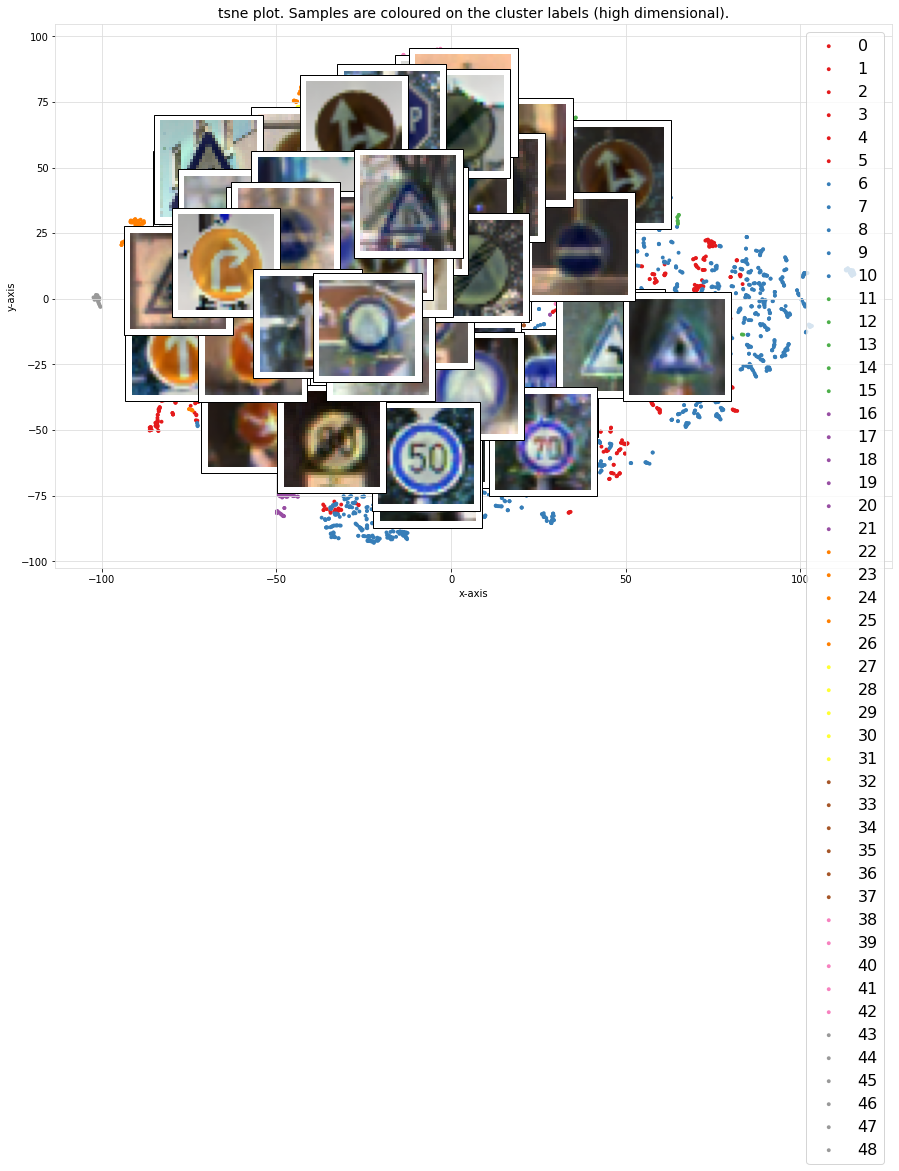

[colourmap]> Warning: Colormap [Set1] can not create [49] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [49] unique colors! Available unique colors: [9].


<Figure size 432x288 with 0 Axes>

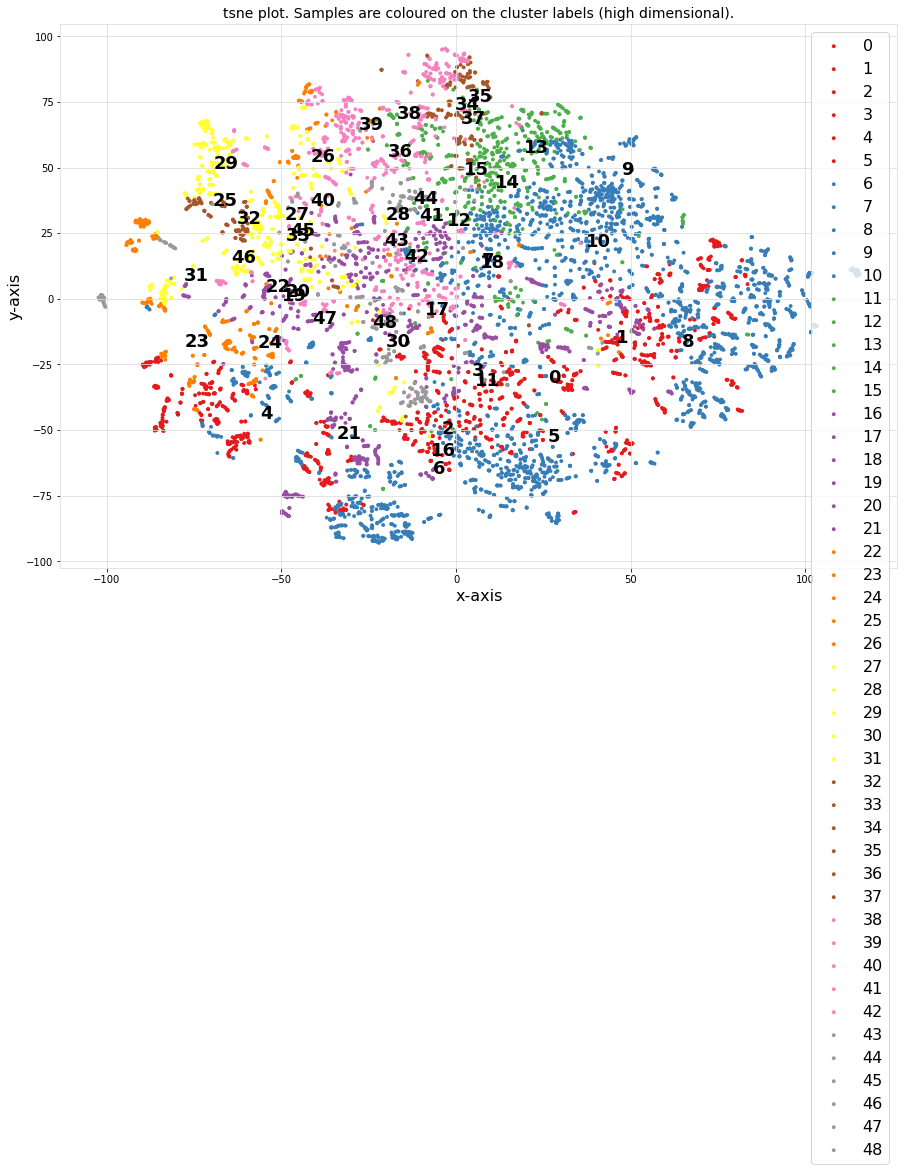

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot: title={'center': 'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 432x288 with 0 Axes>

In [32]:
# Silhouette plots
cl.clusteval.plot()
# PCA explained variance plot
cl.pca.plot()
# Plot unique image per cluster
cl.plot_unique(img_mean=False)
# Scatterplot
cl.scatter(zoom=3, img_mean=False)
cl.scatter(zoom=None, img_mean=False)